# Stage 1 - Individual Empowerment 👨🏻‍🎓
Analytical Model to empower individuals to monitor their cardiovascular health at home

<br>

**Goal:**
- obtain important features (personal) for predicting heart attack risk
- the best model that automatically predict heart attack risk based on the important features (>80% accuracy rate) 

**Dataset:**
- heart_pki_2020_encoded.csv

====================

**Models:**
1. Logistic Regression
2. Gradient Boosting Classification
3. Random Forest

**Logisitic Regression PipeLine:**
1. `Train-test split` -> `SMOTE` (balancing 'HeartDisease' class)
2. Train on train dataset  -> `RFE` (Recursive Feature Elimination, i.e. Backwards Elimination)
3. Select optimal model `evaluation` with test dataset

**Gradient Boosting Classification PipeLine:**
1. `Train-test split` -> `SMOTE` (balancing 'HeartDisease' class)
2. Train on train dataset -> `hypertune parameter` 'learning_rate' and 'n_estimator' -> `Evaluate` each model's accuracy
3. Select optimal model with best accuracy and analyse it with the various metrics

**Random Forest PipeLine:**
1. `Train-test split` -> `SMOTE` (balancing 'HeartDisease' class)
2. Train on train dataset -> optimize model with `feature importance` -> `Evaluate` each model's accuracy
3. Select optimal model with best accuracy and analyse it with the various metrics

==========

<br/>

**Model Explainer:**
- `Local Interpretable Model-agnostic Explanations (LIME)` is employed to explain predictions of random forest model for individual record data
- With LIME, each data record can be well explained, providing a qualitative understanding between the input variables and the response to facilitate understanding and decision making.

<br/>

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" alt="image" width="750" />

<br>
<hr>



## 1. Pre-modelling preparations

- Install dependencies
- Import libraries and dataset
- Train-test split + SMOTE
- Evaluation metrics


#### 1.1 Install dependencies, import libraries and dataset

In [1]:
# install dependencies
# Run the following code in your terminal if you don't have the dependecy installed:
    # pip install -U imbalanced-learn --user
    # pip install statsmodels
    # pip install shap
    # pip install -U scikit-learn
    # pip install -i https://pypi.tuna.tsinghua.edu.cn/simple lime

# Or run in notebook:    
# %pip install -U imbalanced-learn 
# %pip install statsmodels
# %pip install shap
# %pip install -U scikit-learn
# %pip pip install -i https://pypi.tuna.tsinghua.edu.cn/simple lime

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# model-related libraries
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
# import personal_key_indicator dataset
# note: dataset is already OneHotEncoded and Integer Encoded in 'data-cleaning-preprocessing.ipynb'
pki_df = pd.read_csv('datasets/heart_pki_2020_encoded.csv')
pki_df

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,20.34,0.0,0.0,7.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,26.58,20.0,30.0,8.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,24.21,0.0,0.0,6.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0,23.71,28.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315247,0,22.22,0.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
315248,1,27.41,7.0,0.0,6.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
315249,0,29.84,0.0,0.0,5.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
315250,0,24.24,0.0,0.0,6.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [3]:
pki_df.columns.values

array(['HeartDisease', 'BMI', 'PhysicalHealth', 'MentalHealth',
       'SleepTime', 'Smoking_No', 'Smoking_Yes', 'AlcoholDrinking_No',
       'AlcoholDrinking_Yes', 'Stroke_No', 'Stroke_Yes', 'DiffWalking_No',
       'DiffWalking_Yes', 'Sex_Female', 'Sex_Male', 'AgeCategory_18-24',
       'AgeCategory_25-29', 'AgeCategory_30-34', 'AgeCategory_35-39',
       'AgeCategory_40-44', 'AgeCategory_45-49', 'AgeCategory_50-54',
       'AgeCategory_55-59', 'AgeCategory_60-64', 'AgeCategory_65-69',
       'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White', 'Diabetic_No', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)',
       'PhysicalActivity_No', 'PhysicalActivity_Yes',
       'GenHealth_Excellent', 'GenHealth_Fair', 'GenHealth_Good',
       'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_No', 'Asthma_

#### 1.2 Train-Test split + SMOTE (Synthetic Minority Oversampling Technique)

**1.2 a) Train-Test spliting of dataset**

In [4]:
X = pki_df.loc[:, pki_df.columns != 'HeartDisease']
y = pki_df.loc[:, pki_df.columns == 'HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**1.2 b) The 'HeartDisease' is unbalanced, so we need to resample it (using SMOTE on trainset)**

Note: only for trainset for RFE (Recursive Feature Elimination)

In [5]:
num_of_HD_Yes = len(pki_df[pki_df['HeartDisease'] == 1])
num_of_HD_No = len(pki_df[pki_df['HeartDisease'] == 0])
num_rows = len(pki_df)

print('Proportion of HeartDisease == 0:', num_of_HD_No/num_rows)
print('Proportion of HeartDisease == 1:', num_of_HD_Yes/num_rows)

Proportion of HeartDisease == 0: 0.9156198850443454
Proportion of HeartDisease == 1: 0.08438011495565452


In [6]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

X_train_os, y_train_os = os.fit_resample(X, y)
X_train_os = pd.DataFrame(data = X_train_os, columns = X.columns)
y_train_os = pd.DataFrame(data = y_train_os, columns = y.columns)


# check the oversampled data (train)
print("===== Oversampled data =====")

num_of_HD_Yes = len(y_train_os[y_train_os['HeartDisease'] == 1])
num_of_HD_No = len(y_train_os[y_train_os['HeartDisease'] == 0])
num_rows = len(X_train_os)

print("Total number of rows:", num_rows)
print("Number of Heart Disease == 0 rows:", num_of_HD_No)
print("Number of Heart Disease == 1 rows:", num_of_HD_Yes)

print("Proportion of HeartDisease == 0:", num_of_HD_No/num_rows)
print("Proportion of HeartDisease == 1:", num_of_HD_Yes/num_rows)

===== Oversampled data =====
Total number of rows: 577302
Number of Heart Disease == 0 rows: 288651
Number of Heart Disease == 1 rows: 288651
Proportion of HeartDisease == 0: 0.5
Proportion of HeartDisease == 1: 0.5


In [7]:
X_train.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
18662,32.98,0.0,0.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
45050,25.61,0.0,0.0,6.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
191308,16.24,0.0,0.0,7.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
105093,18.30,0.0,0.0,9.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
161942,31.57,5.0,0.0,8.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


#### 1.3 Metrics to measure performance (in the final comparison)

- Classification Accuracy (5-fold cross validation)
- Confusion Matrix with true positive rate and false negative rate
- Precision, Recall, and F-score
- ROC AUC Curve score

<br>

**Reference:**
- https://github.com/ztjhz/SC1015-Project/blob/main/Anime/classification.ipynb (done by Jing Qiang from SC1015 module)

In [8]:
# Confusion Matrix
def confusion_matrix_TPR_TNR(y, y_pred, scores, train_test_string):
    from sklearn.metrics import confusion_matrix
    
    # Confusion Matrix
    c_matrix = confusion_matrix(y, y_pred)

    # True Negatives & True Positives
    TN = c_matrix[0][0]
    FP = c_matrix[1][0]
    FN = c_matrix[0][1]
    TP = c_matrix[1][1]

    # True Positive Rate, True Negative Rate, False Positive Rate, False Negative Rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(TN+FP)
    FNR = FN/(TP+FN)

    # Check the Goodness of Fit (on Train Data)
    print(f"Goodness of Fit of Model ({train_test_string} Dataset)")
    print("Classification Accuracy:", scores.mean())
    print("True Positive Rate:", TPR)
    print("True Negative Rate:", TNR)
    print("False Postive Rate:", FPR)
    print("False Negative Rate:", FNR)

    # Plot the Confusion Matrix
    plt.figure(figsize=(8, 8))
    sb.heatmap(c_matrix, 
               annot = True, 
               fmt=".0f", 
               annot_kws={"size": 18}).set(title=f"Confusion Matrix ({train_test_string} Dataset)")
    print()

In [9]:
# Precision and Recall
def get_precision_recall(y, y_pred):
    from sklearn.metrics import precision_score, recall_score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    
    return [precision, recall]

# F-score
def get_f1_score(y, y_pred):
    from sklearn.metrics import f1_score
    
    f1 = f1_score(y, y_pred)
    
    print("f1_score:", f1)
    
    return f1

In [10]:
# ROC AUC Curve score
def ROC_AUC(classifier_model, X_train, y_train, train_test):
    try:
        # getting the probabilities of our predictions
        y_scores = classifier_model.predict_proba(X_train)
        y_scores = y_scores[:,1]

        from sklearn.metrics import roc_curve
        # compute true positive rate and false positive rate
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

        # plotting them against each other
        def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
            plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
            plt.plot([0, 1], [0, 1], 'r', linewidth=4)
            plt.axis([0, 1, 0, 1])
            plt.xlabel('False Positive Rate (FPR)', fontsize=16)
            plt.ylabel('True Positive Rate (TPR)', fontsize=16)
            plt.title(f'{train_test} Dataset')

        plt.figure(figsize=(14, 7))
        plot_roc_curve(false_positive_rate, true_positive_rate)
        plt.show()


        # ROC AUC Score
        from sklearn.metrics import roc_auc_score
        r_a_score = roc_auc_score(y_train, y_scores)
        print("ROC-AUC-Score:", r_a_score)
    except:
        pass

**Function that evaluates a classifier model's performance based on various metrics**
- Cross Validation prediction (CV=5)

In [11]:
def model_performance(classifier_model, X_test, y_test):
    # Import libraries
    from sklearn.model_selection import cross_val_predict
    from sklearn.model_selection import cross_val_score
    
    # K-Fold Cross Validation
    y_test_pred = cross_val_predict(classifier_model, X_test, y_test, cv=5)
    
    test_scores = cross_val_score(classifier_model, X_test, y_test, cv=5, scoring="accuracy")
    
    # Performance metrics

    print("\n\n-----\n-> Test Dataset")
    confusion_matrix_TPR_TNR(y_test, y_test_pred, test_scores, "Test")
    get_precision_recall(y_test, y_test_pred)
    get_f1_score(y_test, y_test_pred)
    ROC_AUC(classifier_model, X_test, y_test, "Test")
    print('-----\n')

<hr>

## 2. Logistic Regression

**Why logistic regression?**
- Depedent variable, `HeartDisease` can be encoded in binary (Yes: 1, No: 1)
- Large dataset of 315252 rows


**References:**
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

#### 2.1 Model Building with Recursive Feature Elimination

- i.e. `Backwards Elimination` until the number of features desired is reached
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html

> Recursive feature elimination.
> 
> Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 
> - Features are ranked by the model’s coef_ or feature_importances_ attributes, 
> - Recursively eliminating a small number of features (least important) per loop until the **desired number of features to select is eventually reached.**
> - Dependencies and collinearity that may exist in the model are eliminate


> Backwards Elimation (https://www.simplilearn.com/what-is-backward-elimination-technique-in-machine-learning-article):
> - The model includes the initial and all explanatory variables in backward elimination. 
> - Then, the variable with the highest p-value is removed from the model. 
> - This process is repeated until all variables in the model have a p-value below a given threshold.


**2.1 \*) If have access to multiple GPUs and can wait for hours/days for computation"**
- Due to `hardward and computing power constraints`, we will NOT be running the following code.
- Large dataset size & large number of features (50)

What the code does:
- Creating a matrix of RFECV results (1 feature to 50 features) to get the optimal number of features from 1 to 50
- Plot the number of features vs accuracy in a graph

In [13]:
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# from sklearn.feature_selection import RFECV

# # Create the RFE object and compute a cross-validated score.
# svc = SVC(kernel="linear")
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator = svc,
#     step = 1,
#     cv = StratifiedKFold(5),
#     scoring = "accuracy",
#     min_features_to_select = min_features_to_select,
# )
# rfecv.fit(X_train_os, y_train_os.values.ravel())


# print("Optimal number of features : %d" % rfecv.n_features_)
# print(rfecv.get_feature_names_out())


# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.show()

**2.1 a) 1st Model (logreg_m20 -> top 20 features)**

Note: due to no access to GPU, large dataset, and large number of features, we will be conducting RFE to select 20 most important features and branch off from there (+-5 number of features) and compare to find the best model


In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)

def rfeLogistic(X, y, n_features):
    logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)

    rfe = RFE(
        logreg, 
        n_features_to_select=n_features, 
        step=1
    )
    rfe = rfe.fit(X, y.values.ravel())
    return rfe

# Logit (Logistic Regression) summary with p-values and pseudo R-squared
# https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html#statsmodels.discrete.discrete_model.Logit
def logitSummary(X, y, rfe):
    # top features
    pki_df_top_features = rfe.get_feature_names_out()
    
    # summary with p-values and pseudo R-squared
    logit_model = sm.Logit(y, X[pki_df_top_features])
    # logit_model_result = logit_model.fit()
    logit_model_result = logit_model.fit_regularized()

    print(logit_model_result.summary2())

    return (logit_model, logit_model_result)

def fitLogRegModel(X_train, y_train, X_test, y_test, rfe):
    # top features
    pki_df_top_features = rfe.get_feature_names_out()

    # Logistic Regression
    logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
    logreg_model_result = logreg_model.fit(X_train[pki_df_top_features], y_train.values.ravel())


    print('Train Accuracy: {:.2f}'.format(logreg_model.score(X_train[pki_df_top_features], y_train.values.ravel())))
    print('Test Accuracy: {:.2f}'.format(logreg_model.score(X_test[pki_df_top_features], y_test.values.ravel())))

    return (logreg_model, logreg_model_result);



In [13]:
# recursive feature elimination
rfe_20 = rfeLogistic(X_train_os, y_train_os, 20)

In [16]:
# model summary
(logit_m20, logit_m20_result) = logitSummary(X_train_os, y_train_os, rfe_20)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.48728523421453845
            Iterations: 118
            Function evaluations: 118
            Gradient evaluations: 118
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.297      
Dependent Variable:    HeartDisease       AIC:                562661.4806
Date:                  2022-10-29 21:07   BIC:                562886.8030
No. Observations:      577302             Log-Likelihood:     -2.8131e+05
Df Model:              19                 LL-Null:            -4.0016e+05
Df Residuals:          577282             LLR p-value:        0.0000     
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        118.0000                                          
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--

In [17]:
# p-values of variables
logit_m20_result.pvalues

AlcoholDrinking_Yes        5.911111e-205
Stroke_No                   0.000000e+00
Sex_Male                    0.000000e+00
AgeCategory_18-24           0.000000e+00
AgeCategory_25-29           0.000000e+00
AgeCategory_30-34           0.000000e+00
AgeCategory_35-39           0.000000e+00
AgeCategory_40-44           0.000000e+00
AgeCategory_45-49          3.855808e-299
AgeCategory_60-64           0.000000e+00
AgeCategory_65-69           0.000000e+00
AgeCategory_70-74           0.000000e+00
AgeCategory_75-79           0.000000e+00
AgeCategory_80 or older     0.000000e+00
Race_Asian                 1.188704e-157
Diabetic_Yes                0.000000e+00
GenHealth_Excellent         0.000000e+00
GenHealth_Fair              0.000000e+00
GenHealth_Poor              0.000000e+00
GenHealth_Very good         0.000000e+00
dtype: float64

In [18]:
# fitting logistic regression model and test accuracy
(logreg_m20, logreg_m20_result) = fitLogRegModel(X_train_os, y_train_os, X_test, y_test, rfe_20)

Train Accuracy: 0.77
Test Accuracy: 0.74


Conclusion (logreg_m20):
- pseduo r-squared is 0.3, which is between 0.2 and 0.4, indicating excellent fit
- p-values of all 20 important variables are close to 0, signifying that they are all statistically significant
- train and test accuracy quite high at 0.77 and 0.73 respectively

<br>

Let's see if increasing the number of features will increase our testset accuracy

**2.1 b) 2nd Model (logreg_m25 -> top 25 features)**

In [24]:
# recursive feature elimination
rfe_25 = rfeLogistic(X_train_os, y_train_os, 25)

In [25]:
# model summary
(logit_m25, logit_m25_result) = logitSummary(X_train_os, y_train_os, rfe_25)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4818544081681745
            Iterations: 111
            Function evaluations: 111
            Gradient evaluations: 111
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.305      
Dependent Variable:    HeartDisease       AIC:                556401.0271
Date:                  2022-10-29 21:16   BIC:                556682.6801
No. Observations:      577302             Log-Likelihood:     -2.7818e+05
Df Model:              24                 LL-Null:            -4.0016e+05
Df Residuals:          577277             LLR p-value:        0.0000     
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        111.0000                                          
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---

In [26]:
# p-values of variables
logit_m25_result.pvalues

Smoking_No                  0.000000e+00
AlcoholDrinking_Yes        8.064462e-307
Stroke_No                            NaN
Stroke_Yes                           NaN
Sex_Female                           NaN
Sex_Male                             NaN
AgeCategory_18-24           0.000000e+00
AgeCategory_25-29           0.000000e+00
AgeCategory_30-34           0.000000e+00
AgeCategory_35-39           0.000000e+00
AgeCategory_40-44           0.000000e+00
AgeCategory_45-49           0.000000e+00
AgeCategory_60-64           0.000000e+00
AgeCategory_65-69           0.000000e+00
AgeCategory_70-74           0.000000e+00
AgeCategory_75-79           0.000000e+00
AgeCategory_80 or older     0.000000e+00
Race_Asian                  6.721381e-50
Race_White                  0.000000e+00
Diabetic_Yes                0.000000e+00
GenHealth_Excellent         0.000000e+00
GenHealth_Fair              0.000000e+00
GenHealth_Poor              0.000000e+00
GenHealth_Very good         0.000000e+00
KidneyDisease_No

In [27]:
# fitting logistic regression model and test accuracy
(logreg_m25, logreg_m25_result) = fitLogRegModel(X_train_os, y_train_os, X_test, y_test, rfe_25)

Train Accuracy: 0.77
Test Accuracy: 0.75


Conclusion (logreg_m25):
- pseduo r-squared is 0.309, which is between 0.2 and 0.4, indicating excellent fit
- train and test accuracy quite high at 0.77 and 0.75 respectively, which is `better` than logreg_m20's test accuracy
- `however`, the p-values of 4 variables are NaN (Stroke_No, Stroke_Yes, Sex_Female, Sex_Male), signifying that they are all not statistically significant


<br>

Let's see if decreasing the number of features by 4 will remove this statitisically insignificant variables

**2.1 c) 3rd Model (logreg_m21 -> top 21 features)**

In [28]:
# recursive feature elimination
rfe_21 = rfeLogistic(X_train_os, y_train_os, 21)

In [29]:
# model summary
print('=== train dataset ===')
(logit_m21, logit_m21_result) = logitSummary(X_train_os, y_train_os, rfe_21)

=== train dataset ===
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.487071631135935
            Iterations: 125
            Function evaluations: 126
            Gradient evaluations: 125
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.297      
Dependent Variable:    HeartDisease       AIC:                562416.8536
Date:                  2022-10-29 21:29   BIC:                562653.4421
No. Observations:      577302             Log-Likelihood:     -2.8119e+05
Df Model:              20                 LL-Null:            -4.0016e+05
Df Residuals:          577281             LLR p-value:        0.0000     
Converged:             1.0000             Scale:              1.0000     
No. Iterations:        125.0000                                          
-------------------------------------------------------------------------
                         Coef.  Std.Err.     z     P>|z|

In [30]:
# p-values of variables
logit_m21_result.pvalues

AlcoholDrinking_Yes        9.012400e-217
Stroke_No                   0.000000e+00
Stroke_Yes                  1.361799e-54
Sex_Male                    0.000000e+00
AgeCategory_18-24           0.000000e+00
AgeCategory_25-29           0.000000e+00
AgeCategory_30-34           0.000000e+00
AgeCategory_35-39           0.000000e+00
AgeCategory_40-44           0.000000e+00
AgeCategory_45-49           0.000000e+00
AgeCategory_60-64           0.000000e+00
AgeCategory_65-69           0.000000e+00
AgeCategory_70-74           0.000000e+00
AgeCategory_75-79           0.000000e+00
AgeCategory_80 or older     0.000000e+00
Race_Asian                 2.721185e-163
Diabetic_Yes                0.000000e+00
GenHealth_Excellent         0.000000e+00
GenHealth_Fair              0.000000e+00
GenHealth_Poor              0.000000e+00
GenHealth_Very good         0.000000e+00
dtype: float64

In [31]:
# fitting logistic regression model and test accuracy
(logreg_m21, logreg_m21_result) = fitLogRegModel(X_train_os, y_train_os, X_test, y_test, rfe_21)

Train Accuracy: 0.77
Test Accuracy: 0.74


Conclusion (logreg_m21):
- pseduo r-squared is 0.302, which is between 0.2 and 0.4, indicating excellent fit
- p-values of all 20 important variables are close to 0, signifying that they are all statistically significant (`better` than logreg_m25)
- train and test accuracy quite high at 0.77 and 0.74 respectively, which is `better` than logreg_m20's test accuracy


<br>

This model appears the best among the 3

#### 2.2 Model Evaluation

- Confusion Matrix, with TPR, TNR, FPR, FNR
- Precision, recall, F1-score and support
- ROC Curve


> The `precision` is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
> 
> The `recall` is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
> 
> The `F1-score` can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
> 
> The `support` is the number of occurrences of each class in y_test.

In [32]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix

def computeConfusionMatrix(y_test, y_test_pred):
    print(confusion_matrix(y_test, y_test_pred))

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print()
    CM1 = metrics.confusion_matrix(y_test, y_test_pred)
    TN1 = CM1[0][0]
    FN1 = CM1[0][1]
    TP1 = CM1[1][1]
    FP1 = CM1[1][0]

    TPR1 = TP1/(TP1+FN1)
    TNR1 = TN1/(TN1+FP1)
    FPR1 = FP1/(TN1+FP1)
    FNR1 = FN1/(TP1+FN1)

    print("The True Positive Rate is\t", TPR1)
    print("The True Negative Rate is\t", TNR1)
    print("False Postive Rate:\t", FPR1)
    print("False Negative Rate\t:", FNR1)
    print()

    # Plot the Confusion Matrix for Train and Test
    plt.figure(figsize=(12, 4))
    sb.heatmap(CM1, annot = True, fmt=".0f", 
               annot_kws={"size": 18})


# Precision, Recall, F1-score and Support
from sklearn.metrics import classification_report

def computeClassificationReport(y_test, y_pred):
    print(classification_report(y_test, y_pred))


# ROC Curve
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def computeROCCurve(model, X_test, y_test, title):    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=title+' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.show()

**2.2 a) Confusion Matrix**

===== logreg_m20 =====
[[64004 22538]
 [ 1846  6188]]
Goodness of Fit of Model 	Test Dataset

The True Positive Rate is	 0.21541460697625844
The True Negative Rate is	 0.9719665907365224
False Postive Rate:	 0.0280334092634776
False Negative Rate	: 0.7845853930237415



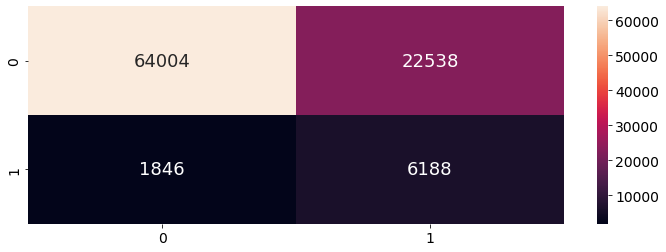

In [33]:
# 1st model
print('===== logreg_m20 =====')
computeConfusionMatrix(y_test, logreg_m20.predict(X_test[rfe_20.get_feature_names_out()]))


===== logreg_m25 =====
[[64469 22073]
 [ 1834  6200]]
Goodness of Fit of Model 	Test Dataset

The True Positive Rate is	 0.21929048915926855
The True Negative Rate is	 0.9723391098442001
False Postive Rate:	 0.027660890155799887
False Negative Rate	: 0.7807095108407315



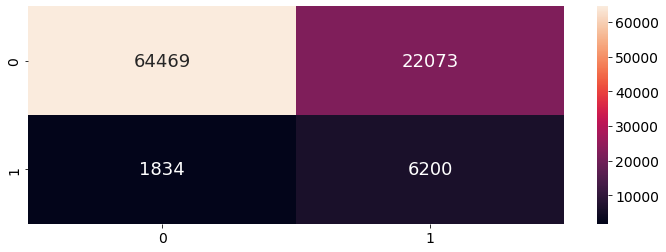

In [34]:
# 2nd model
print('\n===== logreg_m25 =====')
computeConfusionMatrix(y_test, logreg_m25.predict(X_test[rfe_25.get_feature_names_out()]))


===== logreg_m21 =====
[[64004 22538]
 [ 1846  6188]]
Goodness of Fit of Model 	Test Dataset

The True Positive Rate is	 0.21541460697625844
The True Negative Rate is	 0.9719665907365224
False Postive Rate:	 0.0280334092634776
False Negative Rate	: 0.7845853930237415



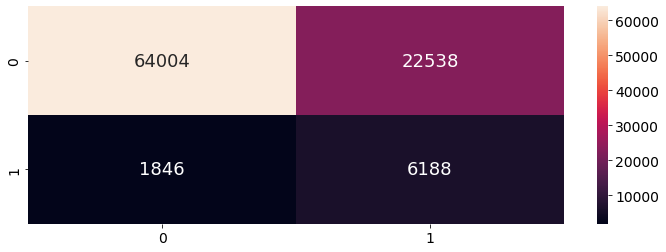

In [35]:

# 3rd model
print('\n===== logreg_m21 =====')
computeConfusionMatrix(y_test, logreg_m21.predict(X_test[rfe_21.get_feature_names_out()]))

Interpretation:
- `logreg_20`: 70192 correct predictions and 24384 incorrect predictions -> 74.22% accuracy
- `logreg_25`: 70669 correct predictions and 23907 incorrect predictions -> 74.72% accuracy
- `logreg_21`: 70192 correct predictions and 24384 incorrect predictions -> 74.22% accuracy

> The accuracy is quite decent for all models.

> All models have a `very bad false negative rate` -> around 78%
 
<br>

We can explore more in depth about this confusion matrix by calculating the precision, recall, and f1-score

**2.2 b) Precision, Recall, F1-score and Support**

In [36]:
# 1st model
print('===== logreg_m20 =====')
computeClassificationReport(y_test, logreg_m20.predict(X_test[rfe_20.get_feature_names_out()]))

===== logreg_m20 =====
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     86542
           1       0.22      0.77      0.34      8034

    accuracy                           0.74     94576
   macro avg       0.59      0.75      0.59     94576
weighted avg       0.91      0.74      0.80     94576



In [37]:
# 2nd model
print('\n===== logreg_m25 =====')
computeClassificationReport(y_test, logreg_m25.predict(X_test[rfe_25.get_feature_names_out()]))


===== logreg_m25 =====
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     86542
           1       0.22      0.77      0.34      8034

    accuracy                           0.75     94576
   macro avg       0.60      0.76      0.59     94576
weighted avg       0.91      0.75      0.80     94576



In [38]:
# 3rd model
print('\n===== logreg_m21 =====')
computeClassificationReport(y_test, logreg_m21.predict(X_test[rfe_21.get_feature_names_out()]))


===== logreg_m21 =====
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     86542
           1       0.22      0.77      0.34      8034

    accuracy                           0.74     94576
   macro avg       0.59      0.75      0.59     94576
weighted avg       0.91      0.74      0.80     94576



Interpretation:
- For `all models`, the weighted avg of precision and recall are decent. The f1-score is also `quite decent` (around 0.8), which shows that the model performs quite decently.

**2.2 c) ROC Curve**
- Receiver operating characteristic (ROC) curve
- The dotted line represents the ROC curve of a purely random classifier
- A good classifier stays as far away from that line as possible (toward the top-left corner).

===== logreg_m20 =====


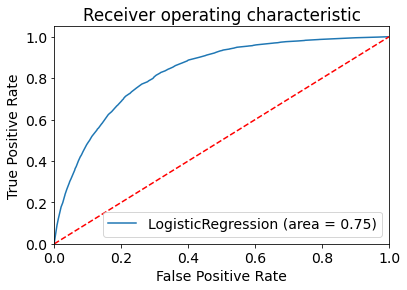


===== logreg_m25 =====


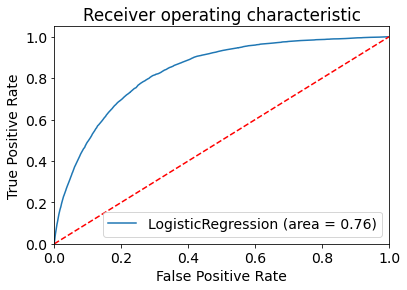


===== logreg_m21 =====


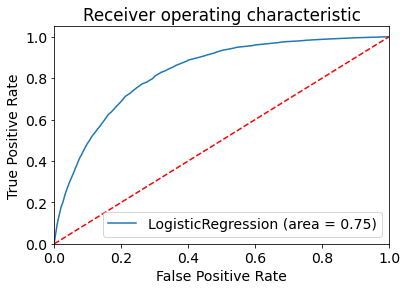

In [39]:
# 1st model
print('===== logreg_m20 =====')
computeROCCurve(logreg_m20, X_test[rfe_20.get_feature_names_out()], y_test, title="LogisticRegression")
# 2nd model
print('\n===== logreg_m25 =====')
computeROCCurve(logreg_m25, X_test[rfe_25.get_feature_names_out()], y_test, title="LogisticRegression")
# 3rd model
print('\n===== logreg_m21 =====')
computeROCCurve(logreg_m21, X_test[rfe_21.get_feature_names_out()], y_test, title="LogisticRegression")

Interpretation:
- The ROC AUC score is quite decent (~0.75), which indicates that all the 3 models are decent classifier for the dataset
- The best ROC AUC score belongs to logreg_m25, which contains 25 features, but 4 of them have statistically insignificant variables
- The model logreg_m21 has a ROC AUC score of 0.75 which is almost the same to that of logreg_25, even though it has less variables.
- Taking the model complexity into account, `logreg_m21` is the better model of the 3

#### 2.3 Logistic Regression Conclusion

**2.3 a) The logistic regression model, `logreg_m21` is the best model among all logistic regression models**
- Highest accuracy performance on test dataset (74.98%) with relatively lesser number of features (21) compared to the other 2 models (logreg_20 & log_reg_25)
- Decent f1-score of 0.8 (similar to the other 2 models)
- Decent ROC AUC score of 0.75 (similar to the other 2 models)
 
<br/>

**2.3 b) NOTE: It can be observed that these 3 models only slightly differ in their performance.**
- This is because we did Recursive Feature Elimination from 50 features to 20/21/25 features
- So what we did here was to further fine-tune and determine the optimal number of features given our hardward constraints (no GPU)

<br/>

Since the model will be used in the medical field, a better model needs to be trained. Nevertheless, we will explore the important features of the best logistic regression.

<br>

**2.3 c) Important Features:**

In [40]:
print(rfe_21.get_feature_names_out())

['AlcoholDrinking_Yes' 'Stroke_No' 'Stroke_Yes' 'Sex_Male'
 'AgeCategory_18-24' 'AgeCategory_25-29' 'AgeCategory_30-34'
 'AgeCategory_35-39' 'AgeCategory_40-44' 'AgeCategory_45-49'
 'AgeCategory_60-64' 'AgeCategory_65-69' 'AgeCategory_70-74'
 'AgeCategory_75-79' 'AgeCategory_80 or older' 'Race_Asian' 'Diabetic_Yes'
 'GenHealth_Excellent' 'GenHealth_Fair' 'GenHealth_Poor'
 'GenHealth_Very good']


The 7 important features are:
- `AlcoholDrinking`
- `Stroke`
- `Sex`
- `AgeCategory`
- `Race`
- `Diabetic`
- `GenHealth`

**2.3 d) How can individuals use this model?**

**Individuals can user the following 6 questions by themselves:**

- `AlcoholDrinking` -> Have more than 7 drinks per week?
  - True/False
- `Stroke` -> (Ever told) (you had) a stroke?
  - True/False
- `Sex` -> What is your gender?
  - Male/Female
- `AgeCategory` -> What is your age range?
  - 13 unique levels age category
  - '18-24'
  - '25-29'
  - '30-34'
  - '35-39'
  - '40-44'
  - '45-49'
  - '50-54'
  - '55-59'
  - '60-64'
  - '65-69'
  - '70-74'
  - '75-79'
  - '80 or older'
- `Race` -> Imputed race/ethnicity value?
  - 6 unique different races
  - 'Race_American Indian/Alaskan Native'
  - 'Race_Asian'
  - 'Race_Black'
  - 'Race_Hispanic'
  - 'Race_Other'
  - 'Race_White'
- `Diabetic` -> (Ever told) (you had) diabetes?
  - 'Diabetic_No'
  - 'Diabetic_No, borderline diabetes'
  - 'Diabetic_Yes'
  - 'Diabetic_Yes (during pregnancy)'
- `GenHealth` -> Would you say that in general your health is...
  - 'GenHealth_Excellent'
  - 'GenHealth_Very good'
  - 'GenHealth_Good'
  - 'GenHealth_Fair'
  - 'GenHealth_Poor'

In [41]:
# asumming this this a individual's answers (after OneHotEncoding)
userAnswers = pd.DataFrame(X_train.loc[1, rfe_21.get_feature_names_out()]).T

userResult = "DANGER! You will have a heart attack soon!" if logreg_m21.predict(userAnswers)[0] else "You are safe :)"

print(userResult)


DANGER! You will have a heart attack soon!


**2.3 e) Assumptions Made**
- Individuals answer the 6 questions truthfully and correctly
- Independence of errors
- Absence of multicollinearity
- Lack of strongly influential outliers.

#### 2.4 Export regression model (logreg_m21)

**2.4 a) Export**

In [42]:
# Save Model Using joblib
import joblib

# save the models to disk
filename = 'models/stage1_logreg_rfe_21.sav'
joblib.dump(rfe_21, filename)

filename = 'models/stage1_logreg_21.sav'
joblib.dump(logreg_m21, filename)

['models/stage1_logreg_21.sav']

**2.4 b) Steps to import model**

In [43]:
# some time later...
 
# load the model from disk
loaded_model_rfe_21 = joblib.load('models/stage1_logreg_rfe_21.sav')
loaded_model_logreg_21 = joblib.load('models/stage1_logreg_21.sav')
result = loaded_model_logreg_21.score(X_test[loaded_model_rfe_21.get_feature_names_out()], y_test)
print(result)

0.7421756048046015


## 3. Gradient Boosting Classifier

**What is it?**
- Iteratively learn from each of the weak learners to build a strong model
- 3 main components:
  1. **Loss Function** 
       - estimate how good the model is at making predictions with the given data
  2. **Weak Learner** 
       - one that classifies our data but does so poorly (i.e. high error rate)
  4. **Additive Model** 
       - Iterative and sequential approach of adding the trees (weak learners) one step at a time. Each iteration should reduce the value of our loss function. After each iteration, we need to be closer to our final model.

**Why Gradient Boosting Classifier?**
- To get a better accuracy compared to logistic regression


**References**
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://blog.paperspace.com/gradient-boosting-for-classification/
- https://medium.com/geekculture/finding-the-important-features-of-a-feature-set-a-classification-task-with-sklearns-algorithms-3003f740faf9
- https://www.kaggle.com/code/ericbae731/feature-importance-of-gradient-boosting-simple/notebook



#### 3.1 Model Building + Hyperparameter Tuning
https://blog.paperspace.com/gradient-boosting-for-classification/

Parameters:
- `n_estimators` : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting, so a large number usually results in a better performance.
- `learning_rate` : learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
- `max_features` : The number of features to consider when looking for the best split.
- `max_depth` : maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
- `random_state` : random_state is the seed used by the random number generator.

<br>

We will conduct hyperparameter tuning on these 2 parameters, `n_estimators` and `learning_rate`, to obtain the best parameters for the model to perform well.


In [44]:
from sklearn.metrics import confusion_matrix

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
n_estimators = [10, 20, 50, 75, 100]

# learning rates + n_estimators
testResultMatrix_GBC = []

for learning_rate in learning_rates:
    curTestResult = []
    for n_estimator in n_estimators:
        gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
        gb.fit(X_train_os, y_train_os.values.ravel())

        # Accuracy
        curTestResult.append(gb.score(X_test, y_test))

        # print("Learning rate: ", learning_rate)
        # print("n_estimator: ", n_estimator)
        # print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_os, y_train_os)))
        # print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))

    testResultMatrix_GBC.append(curTestResult)

In [45]:
print(testResultMatrix_GBC)

[[0.74215445779056, 0.7864891727288107, 0.8049505159871426, 0.8075515987142615, 0.8049610894941635], [0.7423765014379969, 0.8007634072069024, 0.8031107257655219, 0.8025397563863983, 0.8024234478091693], [0.7829999154119438, 0.7945567585856878, 0.8029838436812722, 0.8127114701404162, 0.819023853831839], [0.7821011673151751, 0.8007422601928608, 0.8178396210455083, 0.8375486381322957, 0.8495072745728303], [0.7698147521569955, 0.8056800879715784, 0.8382359160886483, 0.8555024530536288, 0.8636546269666723], [0.7673722720351887, 0.819901454914566, 0.8415454237861614, 0.8598904584672644, 0.8671227372694975]]


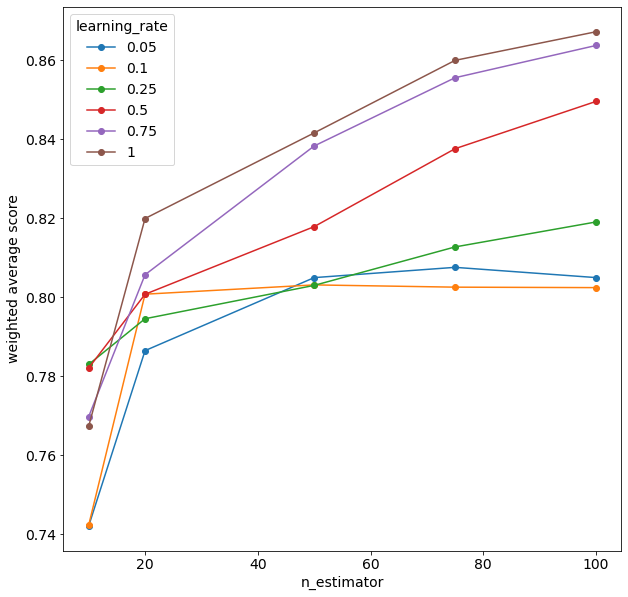

In [46]:
plt.figure(figsize=(10,10))


for i, learning_rate in enumerate(learning_rates):
    # n_estimators
    resultRow = testResultMatrix_GBC[i]

    plt.plot(
        n_estimators, 
        resultRow, 
        label = learning_rate, 
        marker = 'o')
plt.legend(title="learning_rate")
plt.xlabel("n_estimator")
plt.ylabel("weighted average score")
plt.show()

**Conclusion:**
- The best value of `learning_rate` and `n_estimator` combination is (1, 100)

#### 3.2 Fit and Evaluate model with best hyperparameters (learning_rate and n_estimator)

**3.2 a) Model Fitting with best hyperparameters**
- n_estimators = `100`
- learning_rate = `1`
- max_features = 2
- max_depth = 2
- random_state = 0

In [51]:
gbc_m1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gbc_m1.fit(X_train_os, y_train_os.values.ravel())

GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           random_state=0)

**3.2 b) Model evaludation**
- True Positive Rate, True Negative Rate, False Positive Rate, False Negative Rate, Confusion Matrix
- Precision, recall, F1-score and support
- ROC Curve

In [52]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

def printGBCConfusionMatrix(gbc, y_train_os_pred, y_test_pred):
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", gbc.score(X_train_os, y_train_os))
    CM1 = confusion_matrix(y_train_os, y_train_os_pred)
    TN1 = CM1[0][0]
    FN1 = CM1[0][1]
    TP1 = CM1[1][1]
    FP1 = CM1[1][0]
    TPR1 = TP1 / (TP1 + FN1)
    TNR1 = TN1 / (TN1 + FP1)
    FPR1 = FP1/(TN1+FP1)
    FNR1 = FN1/(TP1+FN1)
    print("True Positive Rate:\t", TPR1)
    print("True Negative Rate:\t", TNR1)
    print("False Postive Rate:\t", FPR1)
    print("False Negative Rate:\t", FNR1)
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", gbc.score(X_test, y_test))
    print()
    CM2 = metrics.confusion_matrix(y_test, y_test_pred)
    TN2 = CM2[0][0]
    FN2 = CM2[0][1]
    TP2 = CM2[1][1]
    FP2 = CM2[1][0]

    TPR2 = TP2 / (TP2 + FN2)
    TNR2 = TN2 / (TN2 + FP2)
    FPR2 = FP2/(TN2+FP2)
    FNR2 = FN2/(TP2+FN2)
    print("The True Positive Rate is\t", TPR2)
    print("The True Negative Rate is\t", TNR2)
    print("False Postive Rate:\t", FPR2)
    print("False Negative Rate:\t", FNR2)
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(CM1, annot = True, fmt=".0f", 
               annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(CM2, annot = True, fmt=".0f", 
               annot_kws={"size": 18}, ax = axes[1])


# Precision, Recall, F1-score and Support
from sklearn.metrics import classification_report

def computeClassificationReport(y_test, y_pred):
    print(classification_report(y_test, y_pred))


# ROC Curve
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def computeROCCurve(model, X_test, y_test, title):    
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=title+' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    
    plt.show()

**Confusion Matrix**

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.901761989392034
True Positive Rate:	 0.9129185478472648
True Negative Rate:	 0.8911924439197166
False Postive Rate:	 0.10880755608028335
False Negative Rate:	 0.08708145215273524

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8671227372694975

The True Positive Rate is	 0.27724815724815727
The True Negative Rate is	 0.9382353289652966
False Postive Rate:	 0.06176467103470338
False Negative Rate:	 0.7227518427518428



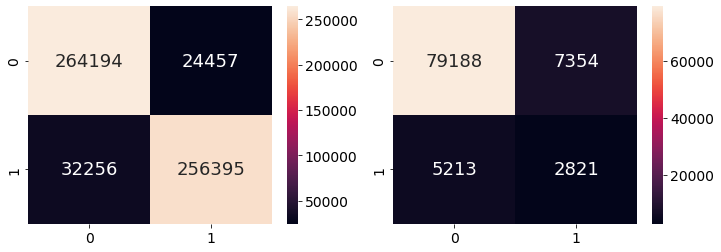

In [53]:
# Confusion Matrix
y_train_os_pred = gbc_m1.predict(X_train_os)
y_test_pred = gbc_m1.predict(X_test)
printGBCConfusionMatrix(gbc_m1, y_train_os_pred, y_test_pred)

- `High classification accuracy` on test dataset (87.54%)
- However, `low` true positive rate and `high` false negative rate on the test dataset, which is very `bad`.

**Precision, Recall, F1-score and Support**

In [54]:
computeClassificationReport(y_test, gbc_m1.predict(X_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     86542
           1       0.28      0.35      0.31      8034

    accuracy                           0.87     94576
   macro avg       0.61      0.63      0.62     94576
weighted avg       0.88      0.87      0.87     94576



- `bad` weighted average for precision, recall, and f1-score for 'HeartDisease' == 1, which shows that the model does not really perfom well (even though it better than logistic regression in terms of classfication accuracy)

**ROC Curve**

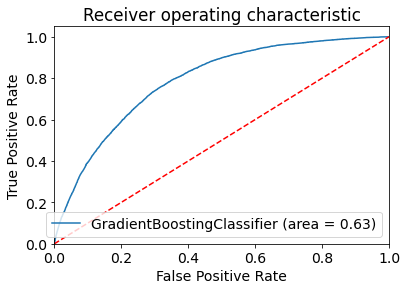

In [55]:
computeROCCurve(gbc_m1, X_test, y_test, "GradientBoostingClassifier")

- ROC AUC score of 0.63, which is `worse` than that of Logistic Regression's

#### 3.3 Comparison with Logistic Regression

`Gradient Boosting Classifier model` is `better` than the best Logistic Regression model in terms of accuracy
- There is a significant boost in the test dataset prediction performance from 74% to `87.54%`

However, the `trade off` is that the true positive rate is low and false negative rate is high.

<br>

Therefore, we should explore another model that has both high classification accuracy and low false negative rate! But nevertheless, we will explore the important features of this Gradient Boosting Classifier

#### 3.4 Feature Importance

Get the top 20 features and compare the base features with that of logistic regression's top features

- https://www.kaggle.com/code/ericbae731/feature-importance-of-gradient-boosting-simple/notebook
- https://medium.com/geekculture/finding-the-important-features-of-a-feature-set-a-classification-task-with-sklearns-algorithms-3003f740faf9

**3.4 a) GBC Feature importance**

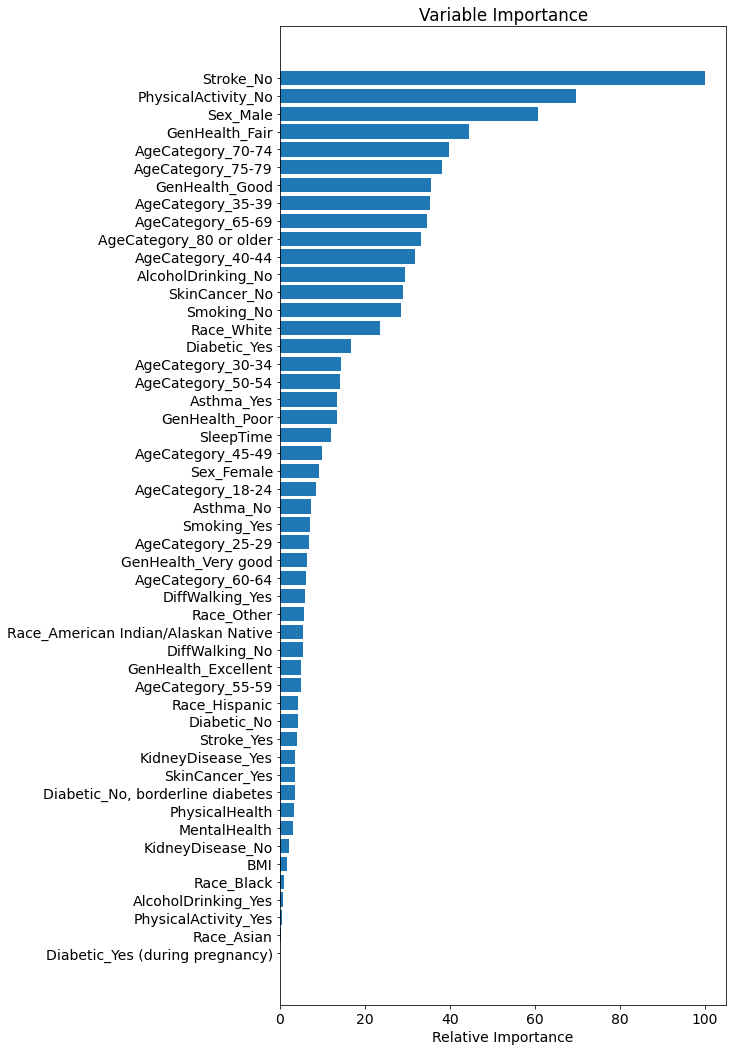

In [56]:
# Reference: https://www.kaggle.com/code/ericbae731/feature-importance-of-gradient-boosting-simple/notebook
# Plot feature importance https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR
feature_importance = gbc_m1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [57]:
# reference: https://medium.com/geekculture/finding-the-important-features-of-a-feature-set-a-classification-task-with-sklearns-algorithms-3003f740faf9
# get top 20 features
imp_features = gbc_m1.feature_importances_

df_imp_features = pd.DataFrame({"features":X_train.keys()}).join(pd.DataFrame({"weights":imp_features}))
df_imp_features.sort_values(by=['weights'], ascending=False, inplace=True)
df_imp_features.head(20)

,features,weights
8,Stroke_No,0.118067
37,PhysicalActivity_No,0.082229
13,Sex_Male,0.071539
40,GenHealth_Fair,0.052450
24,AgeCategory_70-74,0.046847
25,AgeCategory_75-79,0.044921
41,GenHealth_Good,0.042016
17,AgeCategory_35-39,0.041649
23,AgeCategory_65-69,0.040842
26,AgeCategory_80 or older,0.039252


In [58]:
print(df_imp_features.head(20)['features'].tolist())

['Stroke_No', 'PhysicalActivity_No', 'Sex_Male', 'GenHealth_Fair', 'AgeCategory_70-74', 'AgeCategory_75-79', 'GenHealth_Good', 'AgeCategory_35-39', 'AgeCategory_65-69', 'AgeCategory_80 or older', 'AgeCategory_40-44', 'AlcoholDrinking_No', 'SkinCancer_No', 'Smoking_No', 'Race_White', 'Diabetic_Yes', 'AgeCategory_30-34', 'AgeCategory_50-54', 'Asthma_Yes', 'GenHealth_Poor']


Top 11 important features are:
- `Stroke`
- Sex
- PhysicalActivity
- GenHealth
- AgeCategory
- Smoking
- AlcoholDrinking
- SkinCancer
- Race
- Diabetic
- Asthma

According to the feature importance weights, `Stroke` is an `extremely feature` as it has the greatest weight value of 0.12 which is significantly more than the other features' weight value

**3.4 b) Comparing top features with logistic regression's**

The 7 important features from Logistic Regression are:
- AlcoholDrinking
- Stroke
- Sex
- AgeCategory
- Race
- Diabetic
- GenHealth

<br>

**All of the 7 features included** in Logistic Regression are included in the Gradient Boosting Classifier! Hence, we can include all the 7 questions we have previously written for users to follow, and add on 6 more questions pertaining to 'Sex', 'PhysicalActivity', 'Smoking', 'SkinCancer', and 'Asthma'.

#### 3.5 Export Gradient Boosting Classifier (gbc_m1)

**3.5 a) Export**


In [59]:
# Save Model Using joblib
import joblib

# save the models to disk
filename = 'models/stage1_gbc_m1.sav'
joblib.dump(gbc_m1, filename)


['models/stage1_gbc_m1.sav']

**3.5 b) How to Import:**

In [60]:
# some time later...
 
# load the model from disk
loaded_gbc_m1 = joblib.load('models/stage1_gbc_m1.sav')
result = loaded_gbc_m1.score(X_test, y_test)
print(result)

0.8671227372694975


## 4. Random Forest

**Why Random Forest?**
- Random forest is essentially a CART algorithm (Classification and Regression Trees), except it creates an ensemble of many trees instead of just one.
  - Improved performance (the wisdom of crowds)
  - Improved robustness (less likely to overfit since it relies on many random trees)


References:
- https://towardsdatascience.com/random-forest-models-why-are-they-better-than-single-decision-trees-70494c29ccd1
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier
- https://github.com/ztjhz/SC1015-Project/blob/main/Anime/classification.ipynb (done by Jing Qiang from SC1015 module)

#### 4.1 Model Building (random_forest_m1)

In [52]:
random_forest_m1 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
random_forest_m1.fit(X_train_os, y_train_os.values.ravel())

RandomForestClassifier(oob_score=True, random_state=42)

accuracy:  0.996246405007613
True Positive Rate:	 0.9830167316643603
True Negative Rate:	 0.9974603760952128
False Postive Rate:	 0.002539623904787191
False Negative Rate:	 0.016983268335639703


[Text(0.5, 1.0, 'Confusion Matrix (Test Dataset)')]

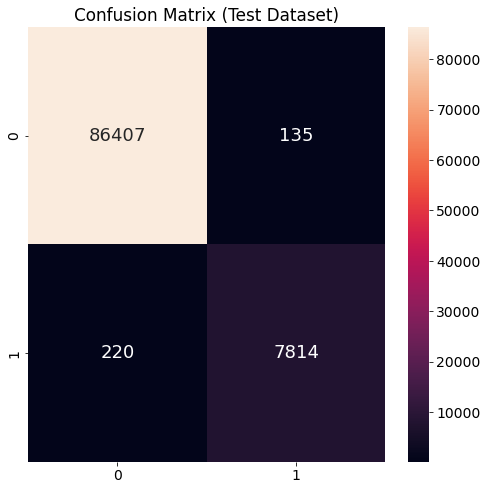

In [53]:
y_test_pred = random_forest_m1.predict(X_test)
print("accuracy: ", random_forest_m1.score(X_test, y_test))

CM1 = confusion_matrix(y_test, y_test_pred)
TN1 = CM1[0][0]
FN1 = CM1[0][1]
TP1 = CM1[1][1]
FP1 = CM1[1][0]
TPR1 = TP1 / (TP1 + FN1)
TNR1 = TN1 / (TN1 + FP1)
FPR1 = FP1/(TN1+FP1)
FNR1 = FN1/(TP1+FN1)
print("True Positive Rate:\t", TPR1)
print("True Negative Rate:\t", TNR1)
print("False Postive Rate:\t", FPR1)
print("False Negative Rate:\t", FNR1)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 8))
sb.heatmap(CM1, 
    annot = True, 
    fmt=".0f", 
    annot_kws={"size": 18}).set(title=f"Confusion Matrix (Test Dataset)")

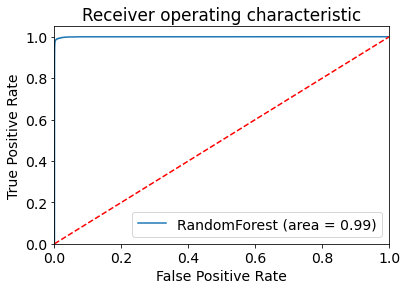

In [54]:
computeROCCurve(random_forest_m1, X_test, y_test, "RandomForest")

**Conclusion:**
- The random forest performs so much better than the gradient boosting classifier and logistic regression
  - It has both a `very high classficiation accuracy` and a `very low false negative rate`
  - It has a `extremely high ROC AUC score`!

#### 4.2 Optimising model with `feature importance` (random_forest_m2)

**4.2 a) Feature Importance**

- Sklearn measure features importance by looking at how much the tree nodes, that use that feature and reduce impurity on average (across all trees in the forest).
- The score is scaled such that the sum of all important feature is equal to 1.

In [55]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest_m1.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).reset_index(drop=True)
importances

,feature,importance
0,BMI,0.123
1,AgeCategory_80 or older,0.056
2,SleepTime,0.054
3,Diabetic_Yes,0.041
4,Race_White,0.039
5,DiffWalking_No,0.038
6,AgeCategory_70-74,0.038
7,DiffWalking_Yes,0.035
8,AgeCategory_75-79,0.035
9,GenHealth_Excellent,0.034


**Interpretation:**
- The most importance feature is `BMI`!
- There are many features with importance value of less than `0.01`! 
- We will attempt to boost the random forest performance by excluding those features with importance value of 0.001 first


**4.2 b) Optimising random forest classifier by excluding not important features**
- Exclude features with importance value of 0.001

In [56]:
cols_to_drop = [
    # "SkinCancer_No",
	# "SkinCancer_Yes",
    # "AgeCategory_50-54",
	# "Asthma_Yes",
	# "Asthma_No",
	# "AgeCategory_45-49",
	# "KidneyDisease_Yes",
	# "KidneyDisease_No",
	# "Race_Hispanic",
	# "AgeCategory_40-44",
	# "AgeCategory_35-39",
	# "AgeCategory_30-34",
	# "AlcoholDrinking_No",
	# "AlcoholDrinking_Yes",
	# "Race_Black",
	# "AgeCategory_25-29",
	# "AgeCategory_18-24",
	# "Diabetic_No, borderline diabetes",
	# "Race_Other",
	"Diabetic_Yes (during pregnancy)",
	"Race_American Indian/Alaskan Native",
	"Race_Asian"
]

In [57]:
# Random Forest
random_forest_m2 = RandomForestClassifier(n_estimators=100, oob_score = True, random_state=42)
random_forest_m2.fit(X_train.drop(cols_to_drop, axis=1), y_train.values.ravel())

RandomForestClassifier(oob_score=True, random_state=42)

accuracy:  0.903463880900017
True Positive Rate:	 0.32949595519601743
True Negative Rate:	 0.9236553490510278
False Postive Rate:	 0.07634465094897222
False Negative Rate:	 0.6705040448039826


[Text(0.5, 1.0, 'Confusion Matrix (Test Dataset)')]

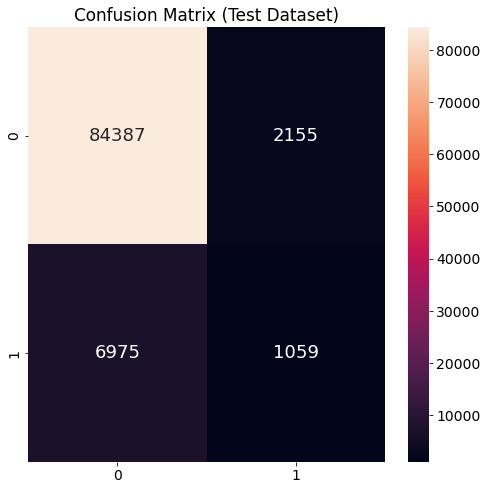

In [58]:
y_test_pred = random_forest_m2.predict(X_test.drop(cols_to_drop, axis=1))
print("accuracy: ", random_forest_m2.score(X_test.drop(cols_to_drop, axis=1), y_test))

CM1 = confusion_matrix(y_test, y_test_pred)
TN1 = CM1[0][0]
FN1 = CM1[0][1]
TP1 = CM1[1][1]
FP1 = CM1[1][0]
TPR1 = TP1 / (TP1 + FN1)
TNR1 = TN1 / (TN1 + FP1)
FPR1 = FP1/(TN1+FP1)
FNR1 = FN1/(TP1+FN1)
print("True Positive Rate:\t", TPR1)
print("True Negative Rate:\t", TNR1)
print("False Postive Rate:\t", FPR1)
print("False Negative Rate:\t", FNR1)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 8))
sb.heatmap(CM1, 
    annot = True, 
    fmt=".0f", 
    annot_kws={"size": 18}).set(title=f"Confusion Matrix (Test Dataset)")

**Conclusion:**
- Model performance has `decreased` compared to when all features were included in the random forest model
- Hence, we should keep all features as all of them are somewhat important. If they were not important, they would have a importance value of 0

#### 4.3 Explain Model Using LIME

To establish confidence in the model, we perform predictive analysis of the test set. 

These simulations give a comprehensive view of the model's performance on unknown data. But this does not help to understand why some of our predictions are correct and others are wrong, and we cannot trace the decision path of our model. 

Therefore, it would be better to explain the model's decision boundaries for each piece of data, which would help users understand the prediction results and make decisions.


Reference link: 
https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5


In [84]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['high-risk', 'low-risk'],
    mode='classification'
)

In [110]:
exp = explainer.explain_instance(data_row=X_test.iloc[23], predict_fn=random_forest_m1.predict_proba, 
    num_features=40)
exp.show_in_notebook(show_table=True)

/Users/jianglei/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


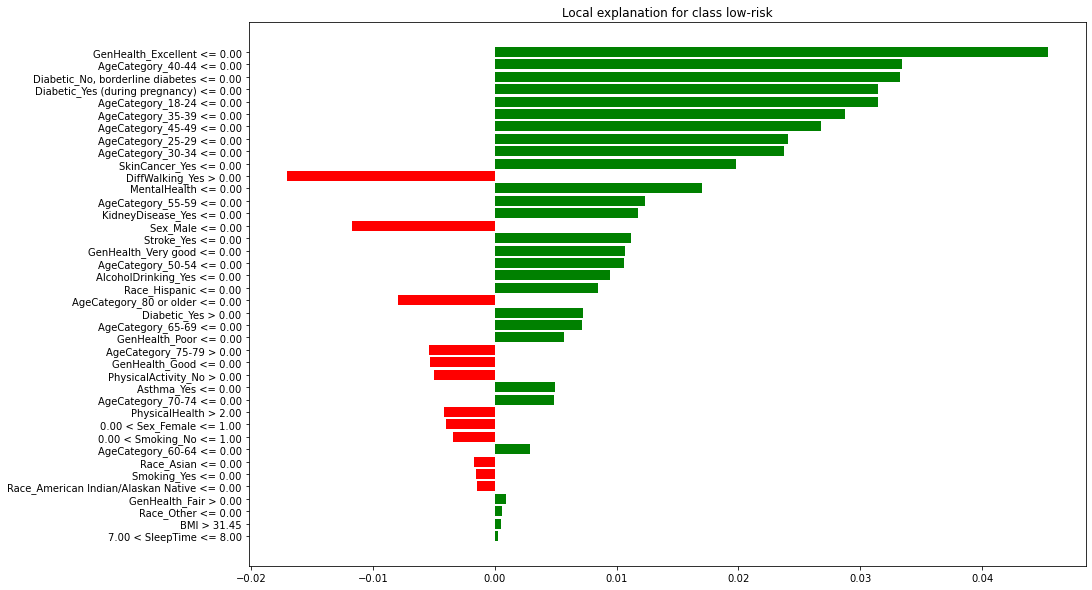

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
fig = exp.as_pyplot_figure(label=1)

In [90]:
pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])

,Feature,Contribution
0,GenHealth_Excellent <= 0.00,0.045329
1,"Diabetic_No, borderline diabetes <= 0.00",0.037425
2,AgeCategory_40-44 <= 0.00,0.036019
3,AgeCategory_35-39 <= 0.00,0.035952
4,AgeCategory_18-24 <= 0.00,0.030494
5,AgeCategory_45-49 <= 0.00,0.029071
6,Diabetic_Yes (during pregnancy) <= 0.00,0.024425
7,DiffWalking_Yes > 0.00,-0.021854
8,AgeCategory_25-29 <= 0.00,0.019814
9,SkinCancer_Yes <= 0.00,0.019531


#### 4.4 Export Random Forest Classifier (random_forest_m1)

**4.4 a) Export**

In [59]:
# Save Model Using joblib
import joblib

# save the models to disk
filename = 'models/stage1_random_forest_m1.sav'
joblib.dump(random_forest_m1, filename)

['models/stage1_random_forest_m1.sav']

**4.4 b) Import**

In [60]:
# some time later...
from sklearn.model_selection import cross_val_score

# load the model from disk
loaded_random_forest_m3 = joblib.load('models/stage1_random_forest_m1.sav')
result = cross_val_score(loaded_random_forest_m3, X_test, y_test.values.ravel(), cv=5, scoring = "accuracy").mean()
print(result)

0.9062024213005764


<hr>

## 5. Stage 1 Conclusion

- `Random Forest Classifier` (random_forest_m1) is the best model among the three different model:
  - Highest classification accuracy of **99.62%**
  - Highest true positive rate of **98.30%**
  - Lowest false negative rate of **1.70%**


- The top features from logistic regression and Gradient Boosting Classifier supports and shows that the **top features in the random forest model is valid and reliable**

<br>

Top **17 important features** are:
- `BMI`
- AgeCategory
- SleepTime
- Diabetic
- Race
- DiffWalking
- GenHealth
- Sex
- PhysicalHealth
- MentalHealth
- Smoking
- Stroke
- PhysicalActivity
- SkinCancer
- Asthma
- KidneyDisease
- AlcoholDrinking


We also found that `Stroke` is an `extremely feature` in predicting cardiovascular disease.

Therefore, users can answer questions with respect to the `11 features` listed above as well as the `LIME` results to gain insight to their cardiovascular health.

In [61]:
gbc_m1 = joblib.load('models/stage1_gbc_m1.sav')
logreg_m21 = joblib.load('models/stage1_logreg_21.sav')
rfe_21 = joblib.load('models/stage1_logreg_rfe_21.sav')
random_forest_m1 = joblib.load('models/stage1_random_forest_m1.sav')

pd.DataFrame([random_forest_m1.score(X_test, y_test), gbc_m1.score(X_test, y_test), logreg_m21.score(X_test[rfe_21.get_feature_names_out()], y_test)], columns=["Analytic Model"], index=["Random Forest", "Gradient Boosting Classifier","Logistic Regression"])


,Analytic Model
Random Forest,0.996246
Gradient Boosting Classifier,0.867123
Logistic Regression,0.742176


In [62]:
# Sample

# asumming this this a individual's answers (after OneHotEncoding)
userAnswers = pd.DataFrame(X_train.loc[1,]).T

userResult = "DANGER! You will have a heart attack soon!" if random_forest_m1.predict(userAnswers)[0] else "You are safe :)"

print(userResult)

You are safe :)


<hr>

### At risk? On To Stage 2! 🚴🏻‍♀️🚴🏻